In [1]:
import sys
import importlib
from collections import defaultdict

import pandas as pd

#!{sys.executable} -m pip install ipython-autotime
#%load_ext autotime
#import time

import statistics
import matplotlib.pyplot as plt

import numpy as np
import math

import random

import seaborn as sns

from copy import deepcopy
import warnings


# Utilidade exponencial
$$\Large u\left ( x \right ) = sign(\lambda) e^{\lambda x }$$

$$\Large u^{-1}\left ( x \right ) = \frac{\log \left (sign\left (\lambda \right)x\right) }{\lambda}$$

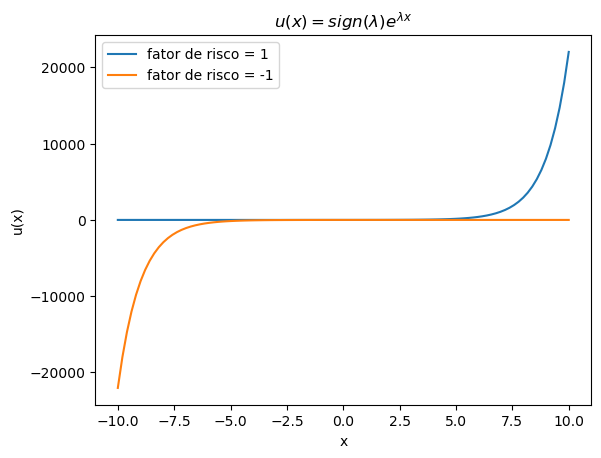

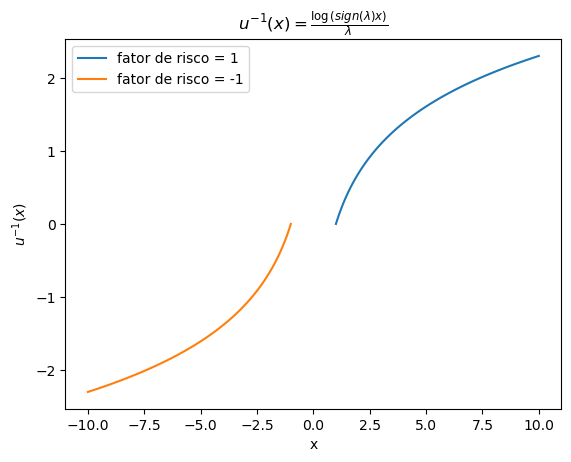

In [2]:
def utility_test(x, lamb):
    return np.sign(lamb) * np.exp(lamb * x)

def rev_utility_test(x, lamb):
    return np.log(np.sign(lamb)* x)/lamb

x = np.linspace(-10, 10, 100)
plt.plot(x, utility_test(x, 1), label='fator de risco = 1')
plt.plot(x, utility_test(x, -1), label='fator de risco = -1')
plt.legend()
plt.title(r'$u\left ( x \right ) = sign(\lambda) e^{\lambda x }$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()

x_pos = np.linspace(1, 10, 100)
x_neg = np.linspace(-10, -1, 100)
plt.plot(x_pos, rev_utility_test(x_pos, 1), label='fator de risco = 1')
plt.plot(x_neg, rev_utility_test(x_neg, -1), label='fator de risco = -1')
plt.legend()
plt.title(r'$u^{-1}\left ( x \right ) = \frac{\log \left (sign\left (\lambda \right)x\right) }{\lambda}$')
plt.xlabel('x')
plt.ylabel(r'$u^{-1}\left ( x \right )$')
plt.show()



# Q-Learning
$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right ) \right ] $$

$$\Large Q_{target}\left ( s , a \right ) =  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a)  $$

$$\Large TD =  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right )  $$

# Q-Learning Y.Shen

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [ TD  \right ] $$

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [u \left ( TD \right )  \right ] $$

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [ u \left ( R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right ) \right ) - x_0 \right ] $$

# Q-Learning implementado - Utilidade no Target

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [  Q_{target} \left ( s , a  \right ) - Q^{i}\left ( s , a \right ) \right ] $$

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [ u \left ( Q_{target} \left ( s , a \right ) \right ) - Q^{i}\left ( s , a \right ) \right ] $$

$$\Large Q^{i+1}\left ( s , a \right ) = Q^{i}\left ( s , a \right ) + \alpha \left [ u \left ( R \left ( s, a \right ) + \gamma u^{-1}\left ( \max_{a} Q^i (s',a) \right )  \right ) -  Q^{i}\left ( s , a \right ) \right ] $$

# Value Iteration

## Value Iteration - Utilidade no Target

$$\Large u \left ( Q^{i+1} (s,a) \right )  \leftarrow  \sum_{s' \in S} T\left(s'| s, a\right)  u \left ( R\left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right) $$

## Value Iteration - Utilidade no Target com taxa de aprendizado

$$\Large u \left ( Q^{i+1}\left ( s , a \right ) \right ) \leftarrow u \left ( Q^{i}\left ( s , a \right ) \right ) + \alpha \left [ \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) u \left ( R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right ) - u \left ( Q^{i}\left ( s , a \right ) \right ) \right ]$$

## Value Iteration - Utilidade no TD

$$\Large x_0 = u(0) $$
$$\Large x_0 = sign(\lambda) e^{\lambda \left ( 0 \right )} $$
$$\Large x_0 = sign(\lambda) $$

$$\Large Q^{i+1}\left ( s , a \right ) \leftarrow  Q^{i}\left ( s , a \right ) + \alpha \left [ \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) u \left ( R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right ) \right ) - x_0 \right ]$$
 
 

# Comparando os dois

$$\Large \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) u \left ( R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right ) \right ) - x_0 = 0$$

$$\Large x_0 = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) u \left ( R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right ) \right )$$
 
$$\Large x_0 = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) sign(\lambda) e^{\lambda \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) - Q^{i}\left ( s , a \right )  \right )}$$
 
$$\Large x_0 = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) sign(\lambda) e^{\lambda \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right ) - \lambda Q^{i}\left ( s , a \right )  }$$
 
 
$$\Large x_0 = \frac{1}{e^{\lambda Q^{i}\left ( s , a \right )}} \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) sign(\lambda) e^{\lambda \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right )  } $$
 
 
$$\Large x_0  e^{\lambda Q^{i}\left ( s , a \right )} = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) sign(\lambda) e^{\lambda \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right )  }$$ 
 
 
  
$$\Large sign(\lambda) e^{\lambda Q^{i}\left ( s , a \right )} = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) sign(\lambda) e^{\lambda \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right )  } $$ 
 

$$\Large u \left (Q^{i}\left ( s , a \right )\right ) = \sum_{s' \epsilon 
 S} T \left (s'| s, a \right ) u \left (  R \left ( s, a \right ) + \gamma \max_{a} Q^i (s',a) \right )$$ 

# Primeiro fazemos analise dos dois métodos usando Value Iteration

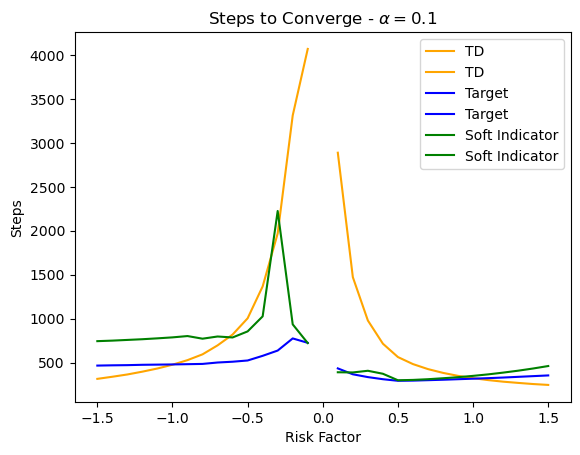

In [10]:
warnings.filterwarnings('ignore')

def plot_steps_converge(df, alpha):
    plt.plot(df[df['lamb']<0][df['TD']>1]['lamb'], df[df['lamb']<0][df['TD']>1]['TD'], label = 'TD', color='orange')
    plt.plot(df[df['lamb']>0][df['TD']>1]['lamb'], df[df['lamb']>0][df['TD']>1]['TD'], label = 'TD', color='orange')
    plt.plot(df[df['lamb']<0][df['Target']>1]['lamb'], df[df['lamb']<0][df['Target']>1]['Target'], label = 'Target', color='blue')
    plt.plot(df[df['lamb']>0][df['Target']>1]['lamb'], df[df['lamb']>0][df['Target']>1]['Target'], label = 'Target', color='blue')

    plt.plot(df[df['lamb']<0][df['SI']>1]['lamb'], df[df['lamb']<0][df['SI']>1]['SI'], label = 'Soft Indicator', color='green')
    plt.plot(df[df['lamb']>0][df['SI']>1]['lamb'], df[df['lamb']>0][df['SI']>1]['SI'], label = 'Soft Indicator', color='green')

    plt.legend()

    plt.title(r'Steps to Converge - $\alpha={}$'.format(alpha))
    plt.xlabel('Risk Factor')
    plt.ylabel('Steps')
    plt.show()
 
result_vi_1 = pd.read_csv('../logs/vi/result_alpha_0.1_steps.log',
                    sep='\t', 
                    names=["lamb", "VI", "Target", "TD", "SI"])
plot_steps_converge(result_vi_1, 0.1)

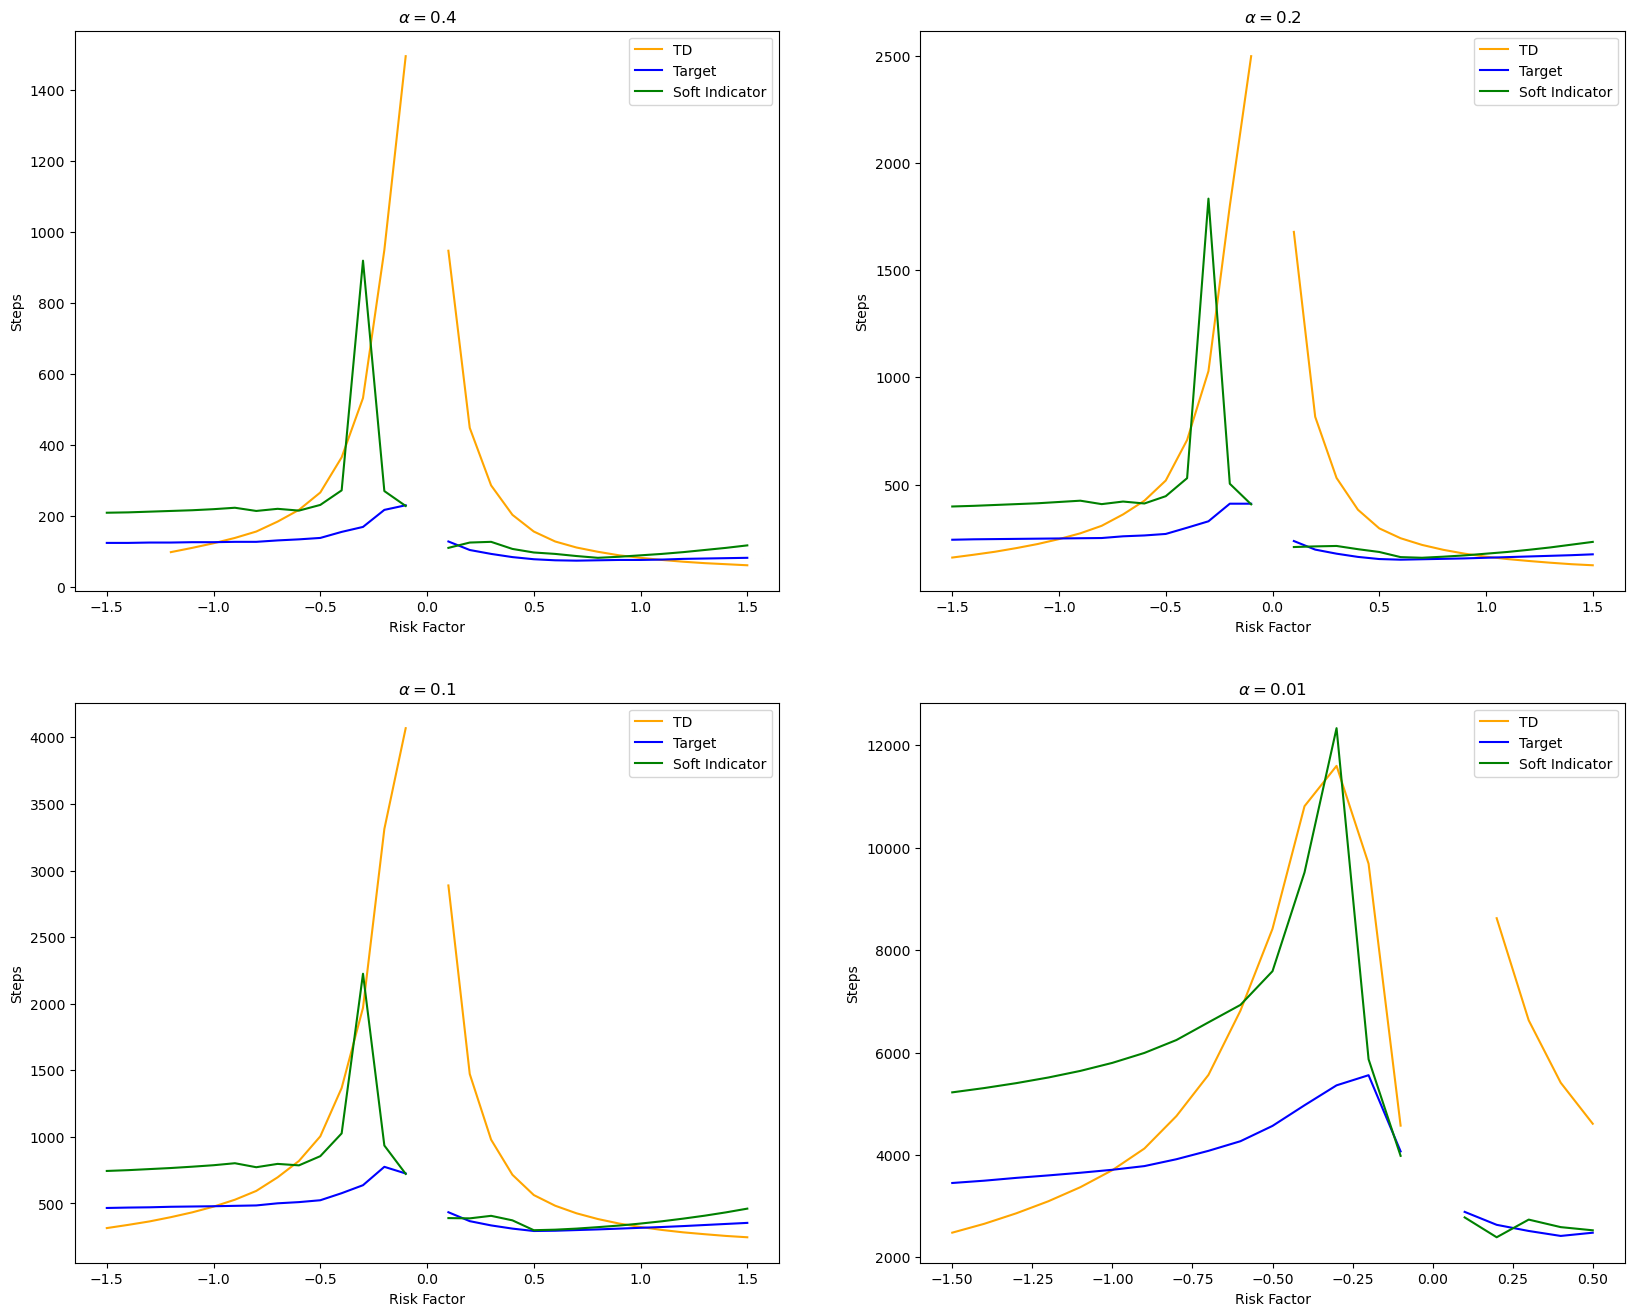

In [51]:
#warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20, 16))
columns = 2
rows = 2

i = 0

for alpha in [0.4,0.2,0.1,0.01]:
    i+=1
    
    df = pd.read_csv('../logs/vi/result_alpha_{}_steps.log'.format(alpha),
                    sep='\t', 
                    names=["lamb", "VI", "Target", "TD", "SI"])

    fig.add_subplot(rows, columns, i)
    plt.plot(df[df['lamb']<0][df['TD']>1]['lamb'], df[df['lamb']<0][df['TD']>1]['TD'], label = 'TD', color='orange')
    plt.plot(df[df['lamb']>0][df['TD']>1]['lamb'], df[df['lamb']>0][df['TD']>1]['TD'], color='orange')
    plt.plot(df[df['lamb']<0][df['Target']>1]['lamb'], df[df['lamb']<0][df['Target']>1]['Target'], label = 'Target', color='blue')
    plt.plot(df[df['lamb']>0][df['Target']>1]['lamb'], df[df['lamb']>0][df['Target']>1]['Target'], color='blue')

    plt.plot(df[df['lamb']<0][df['SI']>1]['lamb'], df[df['lamb']<0][df['SI']>1]['SI'], label = 'Soft Indicator', color='green')
    plt.plot(df[df['lamb']>0][df['SI']>1]['lamb'], df[df['lamb']>0][df['SI']>1]['SI'], color='green')
    plt.legend()

    plt.title(r'$\alpha={}$'.format(alpha))
    plt.xlabel('Risk Factor')
    plt.ylabel('Steps')

plt.show()


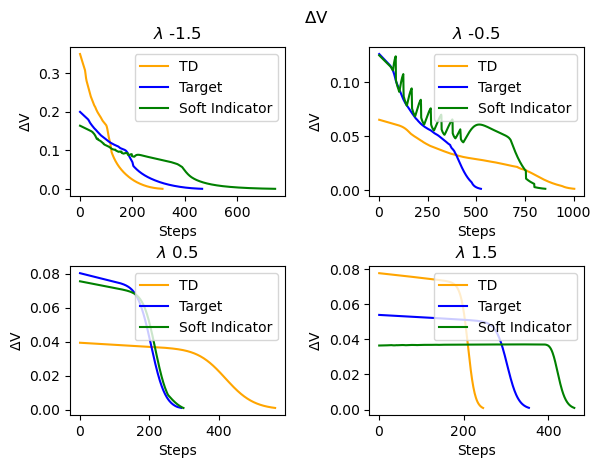

In [52]:
result_vi_diffs = pd.read_csv('../logs/vi/result_alpha_0.1_diffs.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

def plot_vi(df, title, ylabel, plot='all', scale='linear'):
    #warnings.filterwarnings("ignore")
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout(pad=3.0)

    i = 0
    for lamb in [-1.5,-0.5,0.5,1.5]:
        if lamb == -1.5:
            ax = axs[0,0]
        elif lamb == -0.5:
            ax = axs[0,1]
        elif lamb == 0.5:
            ax = axs[1,0]
        elif lamb == 1.5:
            ax = axs[1,1]
        
        if plot == 'all' or plot == 'TD':
            td_neg_15 = df[df['lamb']==lamb][df['type']=='TD'].reset_index()
            ax.plot(td_neg_15['step'], td_neg_15['value'], label = 'TD', color='orange')

        if plot == 'all' or plot == 'Target':
            ta_neg_15 = df[df['lamb']==lamb][df['type']=='Target'].reset_index()
            ax.plot(ta_neg_15['step'], ta_neg_15['value'], label = 'Target', color='blue')
            
        if plot == 'all' or plot == 'SI':
            si_neg_15 = df[df['lamb']==lamb][df['type']=='SI'].reset_index()
            ax.plot(si_neg_15['step'], si_neg_15['value'], label = 'Soft Indicator', color='green')
            
        #plt.yscale('log')
        ax.set_title(r'$\lambda$ {}'.format(lamb))
        ax.set(xlabel='Steps', ylabel=ylabel, yscale=scale)

        ax.legend()

    fig.suptitle(title)
    plt.show()
    
plot_vi(result_vi_diffs, r'$\Delta $V', r'$\Delta $V')

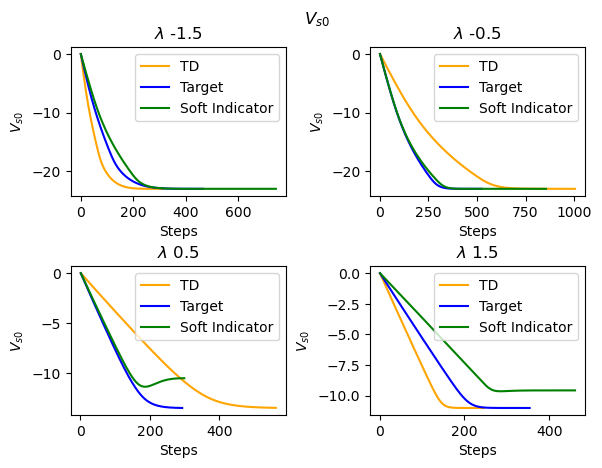

In [50]:
result_vi_diffs = pd.read_csv('../logs/vi/result_alpha_0.1_vso.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

plot_vi(result_vi_diffs, r'$V_{s0}$', r'$V_{s0}$')

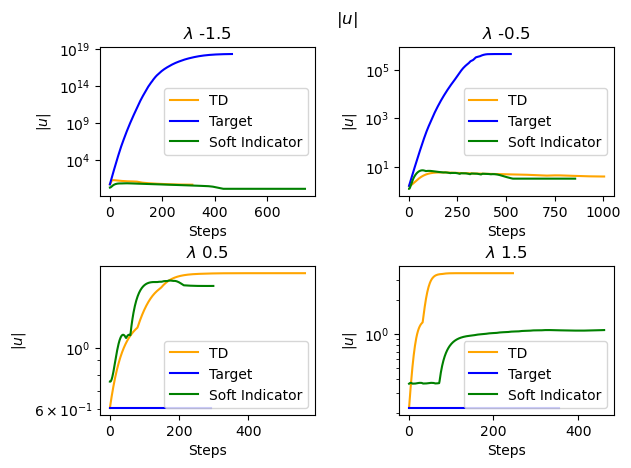

In [42]:
result_vi_diffs = pd.read_csv('../logs/vi/result_alpha_0.1_us.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

plot_vi(result_vi_diffs, r'|$u$|', r'|$u$|', plot='all', scale='log')

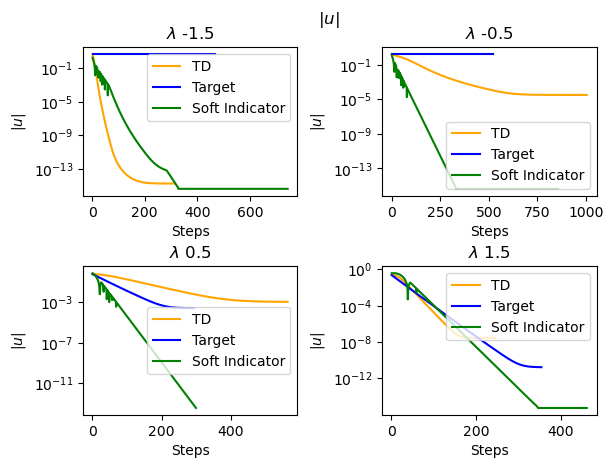

In [41]:
result_vi_diffs = pd.read_csv('../logs/vi/result_alpha_0.1_us_min.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

plot_vi(result_vi_diffs, r'|$u$|', r'|$u$|', plot='all', scale='log')

# Agora trabalhamos com Q-Learning

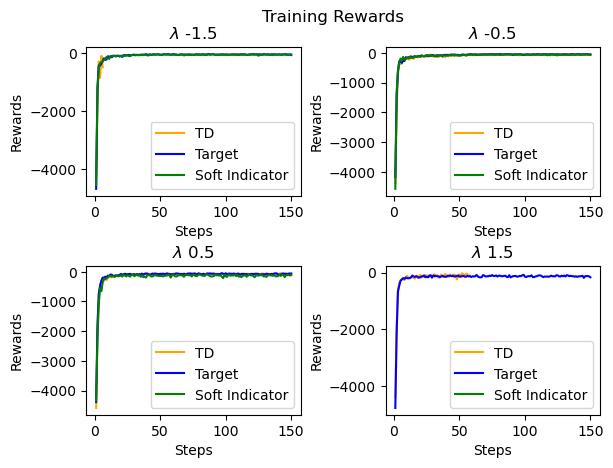

In [64]:
result_ql_rewards = pd.read_csv('../logs/ql2/result_alpha_0.1_rewards.log',
                    sep='\t', 
                    names=["lamb", "type","sample", "step", "value"])

result_ql_rewards_mean = result_ql_rewards.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_ql_rewards_mean, 'Training Rewards', 'Rewards', plot='all')

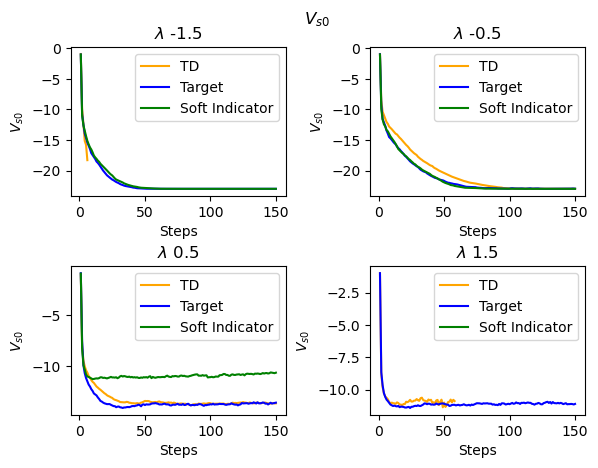

In [65]:
result_ql_vso = pd.read_csv('../logs/ql2/result_alpha_0.1_vso.log',
                    sep='\t', 
                    names=["lamb", "type","sample", "step", "value"])

result_ql_vso_mean = result_ql_vso.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_ql_vso_mean, r'$V_{s0}$', r'$V_{s0}$', plot='all')

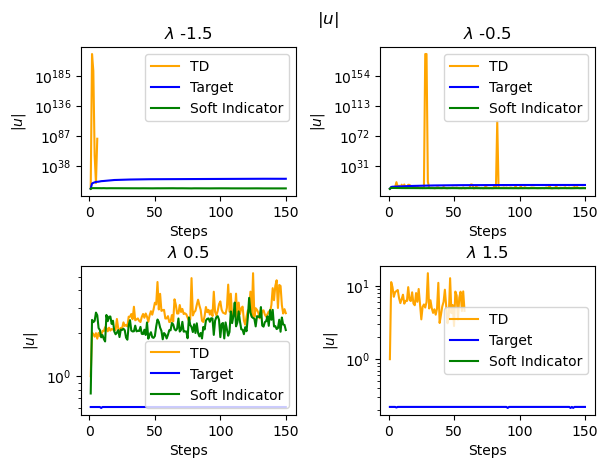

In [66]:
result_ql_u = pd.read_csv('../logs/ql2/result_alpha_0.1_us.log',
                    sep='\t', 
                    names=["lamb", "type","sample", "step", "value"])

result_ql_u_mean = result_ql_u.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_ql_u_mean, r'|$u$|', r'|$u$|', plot='all', scale='log')

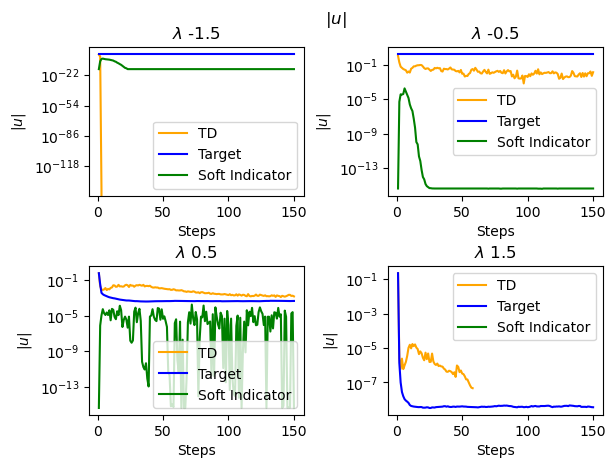

In [67]:
result_ql_u = pd.read_csv('../logs/ql2/result_alpha_0.1_us_min.log',
                    sep='\t', 
                    names=["lamb", "type","sample", "step", "value"])

result_ql_u_mean = result_ql_u.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_ql_u_mean, r'|$u$|', r'|$u$|', plot='all', scale='log')

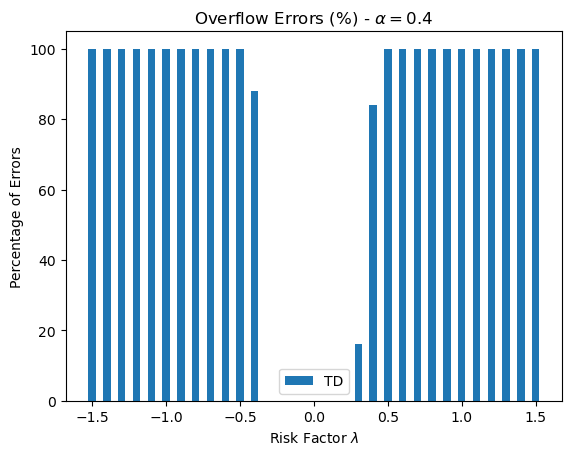

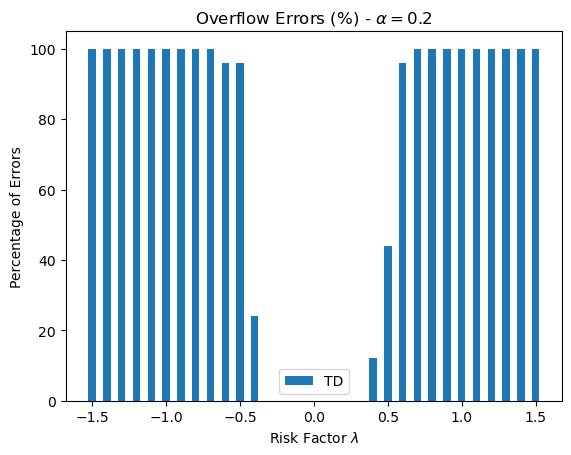

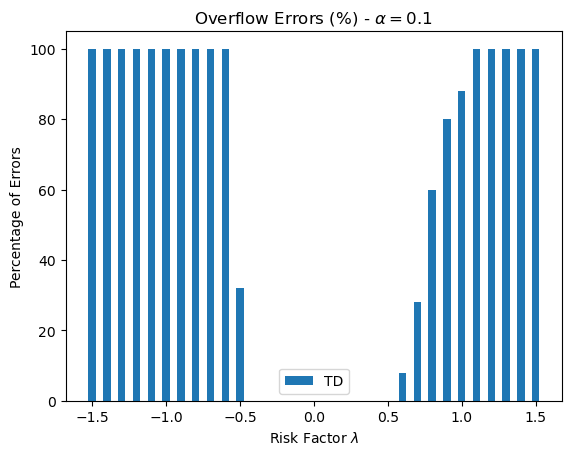

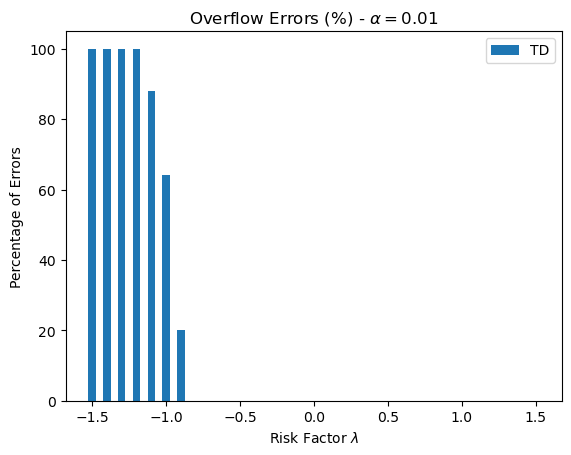

In [92]:
samples = result_ql_vso.groupby(['lamb','type','step']).count().max()

def plot_errors(df, alpha):

    result_ql_errors_count = df.groupby(['lamb','type']).count().reset_index()


    result_ql_errors_count['value'] = result_ql_errors_count['value']*100/samples.get(0)



    for t in result_ql_errors_count['type'].unique():
        d = result_ql_errors_count[result_ql_errors_count['type']==t]

        lambs = result_ql_vso['lamb'].unique()
        values = []
        for l in lambs:
            v = d[d['lamb'] == l]['value'].reset_index()
            v = v['value'].get(0)
            if v is None:
                values.append(0)
            else:
                values.append(v)

        plt.bar(lambs, values, width = 0.05, label=t)

    plt.title(r'Overflow Errors (%) - $\alpha={}$'.format(alpha))
    plt.ylabel('Percentage of Errors')
    plt.xlabel(r'Risk Factor $\lambda$')
    plt.legend()
    plt.show()
    
result_ql_errors = pd.read_csv('../logs/ql2/result_alpha_0.4_error.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])
plot_errors(result_ql_errors, 0.4)   

result_ql_errors = pd.read_csv('../logs/ql2/result_alpha_0.2_error.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])
plot_errors(result_ql_errors, 0.2)    
    
result_ql_errors = pd.read_csv('../logs/ql2/result_alpha_0.1_error.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])
plot_errors(result_ql_errors, 0.1)

result_ql_errors = pd.read_csv('../logs/ql2/result_alpha_0.01_error.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])
plot_errors(result_ql_errors, 0.01)

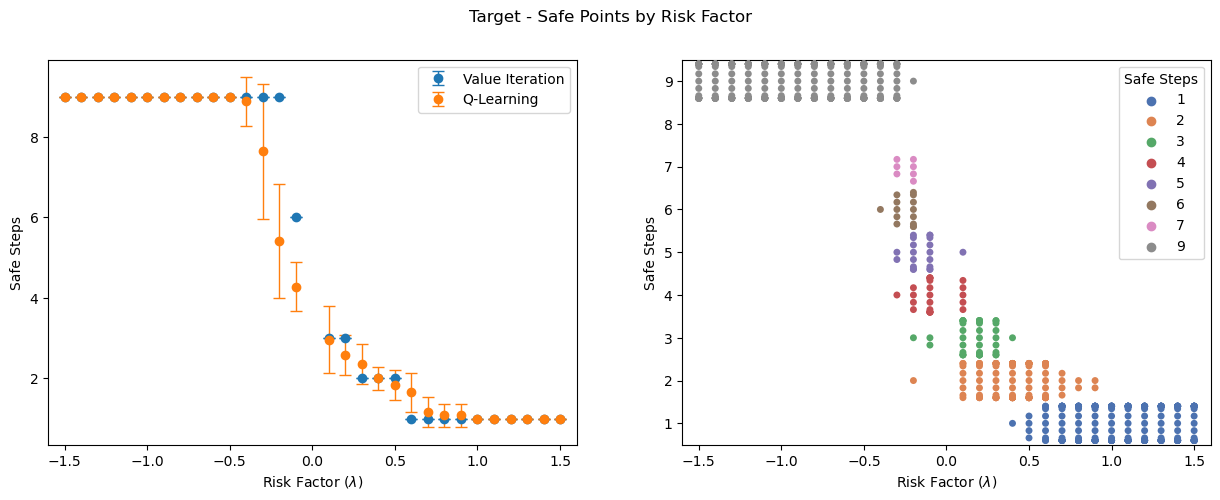

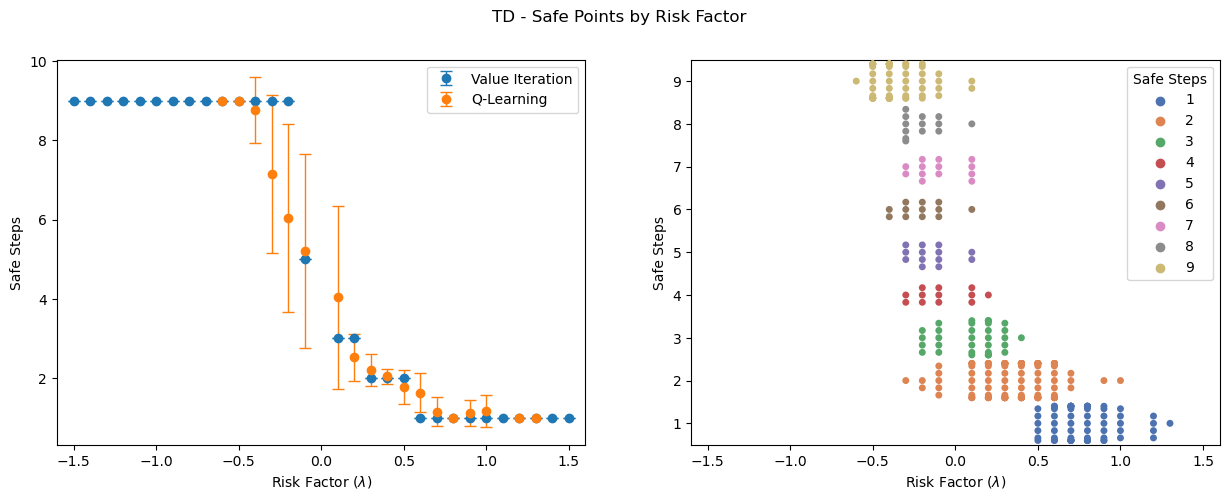

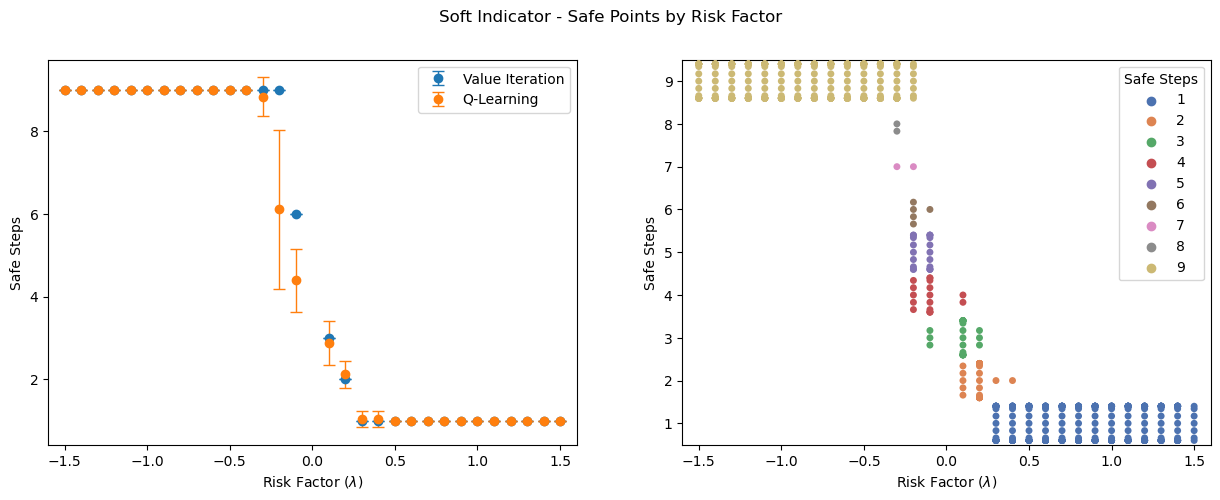

In [104]:

def plot_safe(vi_data_path, ql_data_path, t, title, include_vi = False):
    
    vi_datadf = pd.read_csv(vi_data_path,
                        sep='\t', 
                        names=["lamb", "VI", "Target", "TD", "SI"])
    
    datadf = pd.read_csv(ql_data_path,
                        sep='\t', 
                        names=["lamb", "type", "sample", "episode", "safe_points"])
    
    lambs = [-1.5, -1.0, -0.75, -0.5, -0.2, -0.1, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5]
    lambs = datadf['lamb'].unique()

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    ax1 = axs[0]
    
    # Value Iteration
    if include_vi:
        sd = np.zeros(len(lambs))
        ax1.errorbar(lambs, vi_datadf[t], sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"Value Iteration")

    # moda por amostra
    
    mode_df = datadf[datadf['type'] == t][datadf['episode'] > 100][datadf['lamb'].isin(lambs)].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').std().reset_index()['safe_points']
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    label = 'Q-Learning'
    #if t == 'SI':
    #    label = 'Soft Indicator'
    ax1.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label="{}".format(label))
    

    

    ax1.legend()
    #ax1.set_title('Safe Points by Risk Factor')
    ax1.set(xlabel=r"Risk Factor ($\lambda$)", ylabel='Safe Steps')
    ax1.set_xlim(min(lambs)-0.1, max(lambs)+0.1)

    #segundo
    ax2 = axs[1]
    df = datadf[datadf['type'] == t][datadf['episode'] > 100][datadf['lamb'].isin(lambs)].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    df = df.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"})
    ax2.set_xlim(min(lambs)-0.1, max(lambs)+0.1)
    sns.swarmplot(data=df, order="987654321", y="Safe Steps", x="Risk Factor ($\lambda$)", hue="Safe Steps",dodge=False, palette="deep", legend=True, orient="h", ax=ax2)

    #ax2.set_xticks(df['Risk Factor ($\lambda$)'].unique(), rotation=90)

    fig.suptitle(title)


    plt.show()
    
vi_data_load = '../logs/vi/result_alpha_0.1_safe.log'
data_load = '../logs/ql2/result_alpha_0.1_safe.log'

plot_safe(vi_data_load, data_load, 'Target',"Target - Safe Points by Risk Factor", include_vi = True)
plot_safe(vi_data_load, data_load, 'TD',"TD - Safe Points by Risk Factor", include_vi = True)
plot_safe(vi_data_load, data_load, 'SI',"Soft Indicator - Safe Points by Risk Factor", include_vi = True)



# Agora trabalhamos com DQN

In [ ]:
result_dqn_rewards_1 = pd.read_csv('../logs/dqn2/result_rewards.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])
result_dqn_rewards_2 = pd.read_csv('../logs/dqn2/result_rewards_2.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

result_dqn_rewards = pd.concat([result_dqn_rewards_1, result_dqn_rewards_2])

result_dqn_rewards_mean = result_dqn_rewards.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_dqn_rewards_mean, 'DQN - Training Rewards', 'Rewards', plot='all')

In [ ]:
result_dqn_vso_1 = pd.read_csv('../logs/dqn2/result_vso.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

result_dqn_vso_2 = pd.read_csv('../logs/dqn2/result_vso_2.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

result_dqn_vso = pd.concat([result_dqn_vso_1, result_dqn_vso_2])

result_dqn_vso_mean = result_dqn_vso.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_dqn_vso_mean, r'DQN - $V_{s0}$', r'$V_{s0}$', plot='all')

In [ ]:
result_dqn_u_1 = pd.read_csv('../logs/dqn2/result_us.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

result_dqn_u_2 = pd.read_csv('../logs/dqn2/result_us_2.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

result_dqn_u = pd.concat([result_dqn_u_1, result_dqn_u_2])

result_dqn_u_mean = result_dqn_u.groupby(['lamb','type','step']).mean().reset_index()

plot_vi(result_dqn_u_mean, r'DQN - $u(V_{s0})$', r'$u(V_{s0})$', plot='all')

In [ ]:
result_dqn_errors = pd.read_csv('../logs/dqn2/result_error_2.log',
                    sep='\t', 
                    names=["lamb", "type", "step", "value"])

samples = result_dqn_vso.groupby(['lamb','type','step']).count().max()

result_dqn_errors_count = result_dqn_errors.groupby(['lamb','type']).count().reset_index()


result_dqn_errors_count['value'] = result_dqn_errors_count['value']*100/samples.get(0)



for t in result_dqn_errors_count['type'].unique():
    d = result_dqn_errors_count[result_dqn_errors_count['type']==t]
    
    lambs = result_dqn_vso['lamb'].unique()
    values = []
    for l in lambs:
        v = d[d['lamb'] == l]['value'].reset_index()
        v = v['value'].get(0)
        if v is None:
            values.append(0)
        else:
            values.append(v)
    
    plt.bar(lambs, values, width = 0.05, label=t)

plt.title('DQN - Execution Errors')
plt.ylabel('Execution Errors (%)')
plt.xlabel('Risk Factor')
plt.legend()
plt.show()

In [ ]:
data_load = [ 
    #{'file_path':'../logs/ql/result_dqn_bellman_update_TD_gamma_train.log','label':'DQN - TD'},
    {'file_path':'../logs/ql/result_dqn_bellman_update_Target_gamma_train.log','label':'DQN - Target'}
            ]

plot_safe(data_load,"DQN Target - Safe Points by Risk Factor", include_vi = True)


data_load = [ 
    {'file_path':'../logs/ql/result_dqn_bellman_update_TD_gamma_train.log','label':'DQN - TD'},
    #{'file_path':'../logs/ql/result_dqn_bellman_update_Target_gamma_train.log','label':'DQN - Target'}
            ]


plot_safe(data_load,"DQN TD - Safe Points by Risk Factor", include_vi = True)

In [ ]:
def plot_vi_alpha(df, title, ylabel, alphas, plot='all', plot_vi=False):
    warnings.filterwarnings("ignore")
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout(pad=3.0)

    i = 0
    for alpha in alphas:
        i+=1
        if i == 1:
            ax = axs[0,0]
        elif i == 2:
            ax = axs[0,1]
        elif i == 3:
            ax = axs[1,0]
        elif i == 4:
            ax = axs[1,1]

        if plot == 'all' or plot == 'TD':
            td_neg_15 = df[df['alpha']==alpha][df['type']=='TD']
            ax.plot(td_neg_15['step'], td_neg_15['value'], label = 'TD', color='orange')

        if plot == 'all' or plot == 'Target':
            ta_neg_15 = df[df['alpha']==alpha][df['type']=='Target']
            ax.plot(ta_neg_15['step'], ta_neg_15['value'], label = r'Target $\alpha$', color='blue')
        
        if plot_vi:
            vi_neg_15 = df[df['alpha']==alpha][df['type']=='VI']
            ax.plot(vi_neg_15['step'], vi_neg_15['value'], label = 'Target', color='purple')
        
        ax.set_title(r'$\alpha$ {}'.format(alpha))
        ax.set(xlabel='Steps', ylabel=ylabel)

        ax.legend()

    fig.suptitle(title)
    plt.show()



In [ ]:
result_vi_diffs = pd.read_csv('../logs/vi/alpha_lamb1.5_result_diffs.log',
                    sep='\t', 
                    names=["alpha", "type", "step", "value"])
plot_vi_alpha(result_vi_diffs, r'$\Delta $V for $\lambda = 1.5$', r'$\Delta $V', [1.0,0.80,0.40,0.01])


In [ ]:
result_vi_diffs = pd.read_csv('../logs/vi/alpha_lamb0.5_result_diffs.log',
                    sep='\t', 
                    names=["alpha", "type", "step", "value"])
plot_vi_alpha(result_vi_diffs, r'$\Delta $V for $\lambda = 0.5$', r'$\Delta $V', [1.0,0.80,0.40,0.01])

In [ ]:
result_vi_diffs = pd.read_csv('../logs/vi/alpha_lamb1.5_result_vso.log',
                    sep='\t', 
                    names=["alpha", "type", "step", "value"])
plot_vi_alpha(result_vi_diffs, r'$V_{s0}$ for $\lambda = 1.5$', r'$V_{s0}$', [1.0,0.80,0.40,0.01])


In [ ]:
result_vi_diffs = pd.read_csv('../logs/vi/alpha_lamb0.5_result_vso.log',
                    sep='\t', 
                    names=["alpha", "type", "step", "value"])
plot_vi_alpha(result_vi_diffs, r'$V_{s0}$ for $\lambda = 0.5$', r'$V_{s0}$', [1.0,0.80,0.40,0.01])
